


<p style="font-size:36px;text-align:center"> <b>Airbnb_recruiting_new_user_bookings</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data 

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
2. https://towardsdatascience.com/predicting-destination-countries-for-new-users-of-airbnb-eb0d7db7579f
3. https://towardsdatascience.com/a-machine-learning-approach-building-a-hotel-recommendation-engine-6812bfd53f50
4. https://medium.com/sfu-cspmp/recommendation-systems-user-based-collaborative-filtering-using-n-nearest-neighbors-bf7361dc24e0
5. https://www.diva-portal.org/smash/get/diva2:1108334/FULLTEXT01.pdf
6. https://datascience.stackexchange.com/questions/36862/macro-or-micro-average-for-imbalanced-class-problems

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* low-latency requirement.
* Interpretability is not important.
* Probability of a data-point belonging to each class is needed to give top 5 recommendations.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data
- We have 6 data files: one conatins the user related informations and the other contains the sessions related information.
- Both these data files are having a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        age_gender_bkts.csv.zip
        </li>
        <li>
        countries.csv.zip
        </li>
        <li>
        sample_submission_NDF.csv.zip
        </li>
        <li>
        sessions.csv.zip
        </li>
        <li>
        test_users.csv.zip
        </li>
        <li>
        train_users_2.csv.zip
        </li>
    </ul>
</p>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are 12 possible outcomes of the destination country and can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix, Precision matrix, recall matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the 12 classes.
</p>
<p> Constraints:
</p>
<p>
* Class probabilities are needed.
</p>
<p>
* Penalize the errors in class probabilites => Metric is 
</p>
<p>
Log-loss.
</p>
<p>
* Low Latency constraints.
</p>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"swadeshkothari","key":"99c6665f32c7cd47de90db4da39c0c3b"}'}

In [ ]:
!wget https://github.com/blerim153/kaggle_airbnb_new_user_bookings/blob/master/utilities.py

In [ ]:
!pip install kaggle
"""
To use the Kaggle API, sign up for a Kaggle account at https://www.kaggle.com. 
Then go to the 'Account' tab of your user profile (https://www.kaggle.com/<username>/account) and select 'Create API Token'. 
This will trigger the download of kaggle.json, a file containing your API credentials.
Upload that file to google colab/google cloud platform 
"""
api_token = {"username":"swadeshkothari","key":"99c6665f32c7cd47de90db4da39c0c3b"}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!kaggle competitions download -c 'airbnb-recruiting-new-user-bookings'

!unzip 'train_users_2.csv'
!unzip 'test_users.csv'
!unzip 'sessions.csv'

  0% 0.00/4.07M [00:00<?, ?B/s]
100% 4.07M/4.07M [00:00<00:00, 37.5MB/s]
  0% 0.00/478k [00:00<?, ?B/s]
100% 478k/478k [00:00<00:00, 152MB/s]
  0% 0.00/1.03M [00:00<?, ?B/s]
100% 1.03M/1.03M [00:00<00:00, 145MB/s]
  0% 0.00/546 [00:00<?, ?B/s]
100% 546/546 [00:00<00:00, 566kB/s]
  0% 0.00/2.46k [00:00<?, ?B/s]
100% 2.46k/2.46k [00:00<00:00, 2.43MB/s]
 96% 57.0M/59.1M [00:01<00:00, 35.5MB/s]
100% 59.1M/59.1M [00:01<00:00, 50.9MB/s]
Archive:  train_users_2.csv.zip
  inflating: train_users_2.csv       
Archive:  test_users.csv.zip
  inflating: test_users.csv          
Archive:  sessions.csv.zip
  inflating: sessions.csv            


<h1>3. Importing Libraries</h1>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from scipy import stats
from sklearn.feature_selection import SelectKBest, f_classif,chi2
from scipy.sparse import csr_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported f

<h2>3.1. Reading Data</h2>

In [ ]:
# Taken Reference with understanding from : https://towardsdatascience.com/predicting-destination-countries-for-new-users-of-airbnb-eb0d7db7579f

In [ ]:
data_1 = pd.read_csv('train_users_2.csv')
data_1_test = pd.read_csv('test_users.csv')
print('Number of data points : ', data_1.shape[0])
print('Number of features : ', data_1.shape[1])
print('Features : ', data_1.columns.values)
data_1.head()

Number of data points :  213451
Number of features :  16
Features :  ['id' 'date_account_created' 'timestamp_first_active' 'date_first_booking'
 'gender' 'age' 'signup_method' 'signup_flow' 'language'
 'affiliate_channel' 'affiliate_provider' 'first_affiliate_tracked'
 'signup_app' 'first_device_type' 'first_browser' 'country_destination']


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


## **4. Exploratory Data Analysis**

**4.1. EDA for train_users_2.csv dataset**

**Null Value Analysis**

Date first booking null value percentage :  58.34734904029496 %

Age null value percentage :  41.222575673105304 %

first_affiliate_tracked null value percentage :  2.84140153946339 %



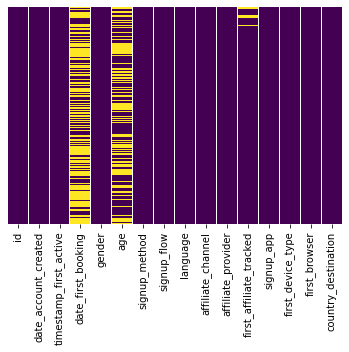

In [ ]:
#Null value Analysis percejtage
sns.heatmap(data_1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
data_1.isnull().sum()

print('Date first booking null value percentage : ',(data_1['date_first_booking'].isnull().sum()/len(data_1['date_first_booking'].isnull())*100),'%\n')
print('Age null value percentage : ',(data_1['age'].isnull().sum()/len(data_1['age'].isnull())*100),'%\n')
print('first_affiliate_tracked null value percentage : ',(data_1['first_affiliate_tracked'].isnull().sum()/len(data_1['first_affiliate_tracked'].isnull())*100),'%\n')

**Unique value analysis in categorical feature**

In [ ]:
#Unique value analysis

print('gender : ',len(data_1[data_1['gender']!=np.nan]['gender'].unique()),'\n') # Contain unknown value
print('signup_method : ',len(data_1[data_1['signup_method']!=np.nan]['signup_method'].unique()),'\n') 
print('language : ',len(data_1[data_1['language']!=np.nan]['language'].unique()),'\n')
print('affiliate_channel : ',len(data_1[data_1['affiliate_channel']!=np.nan]['affiliate_channel'].unique()),'\n')
print('affiliate_provider : ',len(data_1[data_1['affiliate_provider']!=np.nan]['affiliate_provider'].unique()),'\n')
print('first_affiliate_tracked : ',len(data_1[data_1['first_affiliate_tracked']!=np.nan]['first_affiliate_tracked'].unique()),'\n') #Contain NAN 
print('signup_app : ',len(data_1[data_1['signup_app']!=np.nan]['signup_app'].unique()),'\n')
print('first_device_type : ',len(data_1[data_1['first_device_type']!=np.nan]['first_device_type'].unique()),'\n')
print('first_browser : ',len(data_1[data_1['first_browser']!=np.nan]['first_browser'].unique()),'\n') #-unknown-
print('signup_flow : ',len(data_1[data_1['signup_flow']!=np.nan]['signup_flow'].unique()),'\n')
#print('country_destination (Target Variable) : ',len(data_1[data_1['country_destination']!=np.nan]['country_destination'].unique()),'\n')

gender :  4 

signup_method :  3 

language :  25 

affiliate_channel :  8 

affiliate_provider :  18 

first_affiliate_tracked :  8 

signup_app :  4 

first_device_type :  9 

first_browser :  52 

country_destination :  12 



**Univariate and bivariate Analysis**

**Visualizing the users’ ages.**

count    122966.000000
mean         36.512670
std          11.571761
min          15.000000
25%          28.000000
50%          34.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64


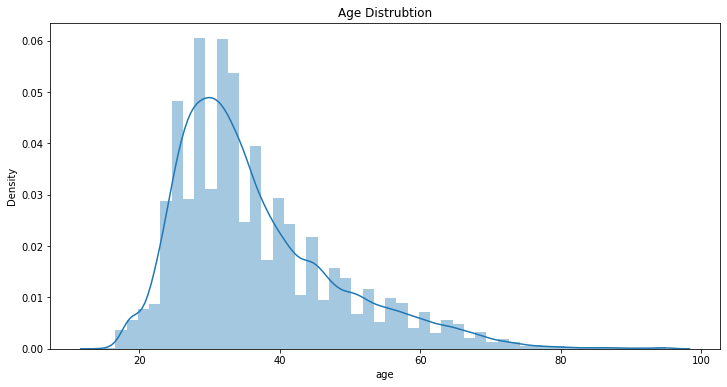

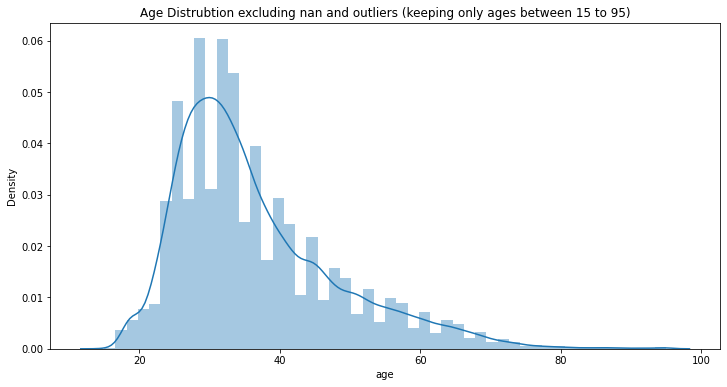

No handles with labels found to put in legend.


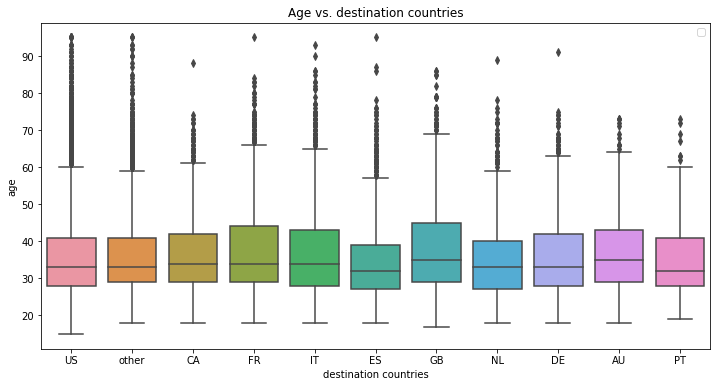

In [ ]:
print(data_1['age'].describe())

plt.figure(figsize=(12,6))
sns.distplot(data_1.age.dropna())
plt.title('Age Distrubtion')
plt.show()

#Excluding nan, less than 15 and grater than 95 values
data_a=data_1
data_a.loc[(data_1.age > 95) | (data_1.age < 15), 'age'] = np.nan
plt.figure(figsize=(12,6))
sns.distplot(data_a.age.dropna())
plt.title('Age Distrubtion excluding nan and outliers (keeping only ages between 15 to 95)')
plt.show()

data_a.loc[(data_1.age > 95) | (data_1.age < 15), 'age'] = np.nan
plt.figure(figsize=(12,6))
sns.boxplot(x='country_destination',y='age', data=data_a.dropna())
plt.xlabel('destination countries')
plt.title('Age vs. destination countries')
plt.legend()
plt.show();


1. Age features contain maximum value is 2014 and minimum value is 1, which is not the valid ages, it can be either born year or current year.
2. It has 41% null values.
3. From the boxplot, ES and PT can be seperable at some level, users having ages between 30 to 34 years prefer these as destination country.


**signup_flow (the page a user came to signup up from)**

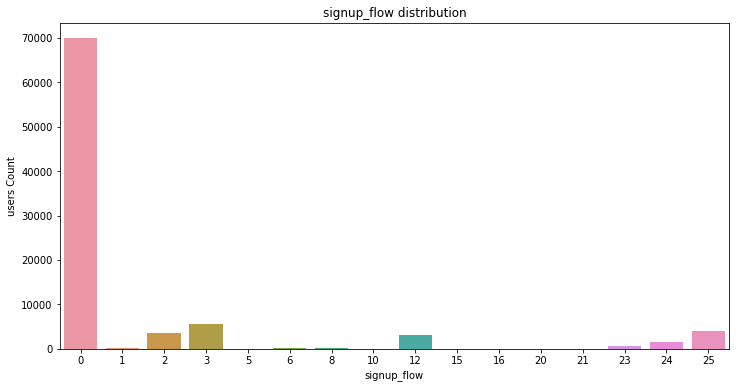

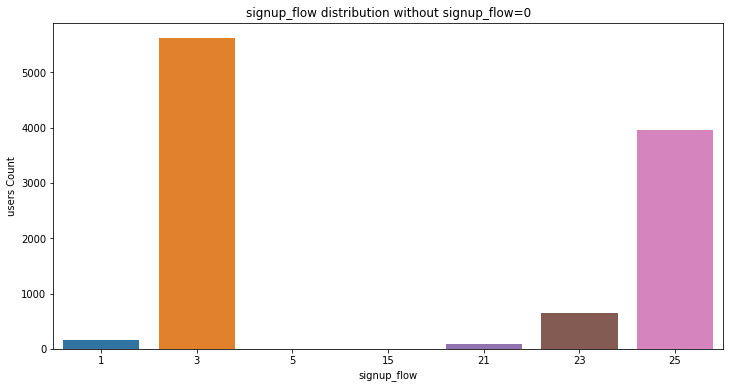

<Figure size 1200x1200 with 0 Axes>

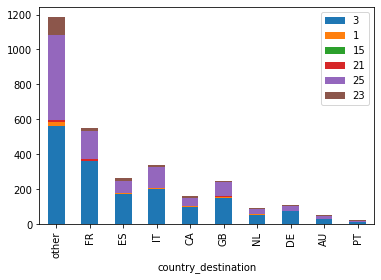

In [ ]:
#data_1.groupby(['signup_flow','country_destination']).count()

data_b=data_1[data_1['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='signup_flow', data=data_b)
plt.ylabel('users Count')
plt.title('signup_flow distribution')
plt.show()

data_b=data_1[(data_1['country_destination']!='NDF') & data_1['signup_flow']!=0]
plt.figure(figsize=(12,6))
sns.countplot(x='signup_flow', data=data_b)
plt.ylabel('users Count')
plt.title('signup_flow distribution without signup_flow=0')
plt.show()

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

plt.figure(figsize=(12,12),dpi= 100)
aggregate('country_destination','signup_flow',data_1[(data_1['country_destination']!='NDF') & (data_1['country_destination']!='US') & data_1['signup_flow']!=0]).plot(kind='bar',stacked=True)
plt.show()

**Gender Analysis**

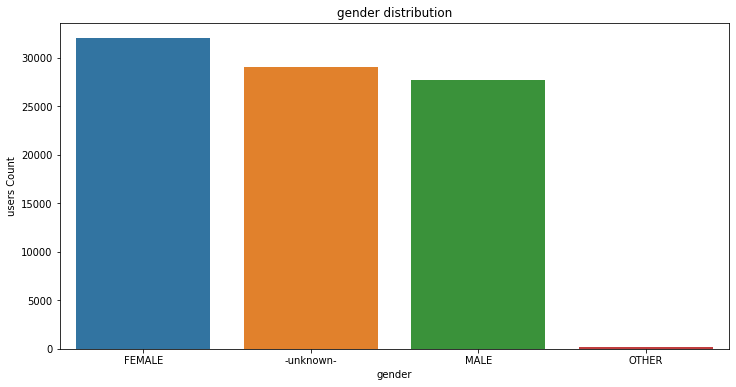

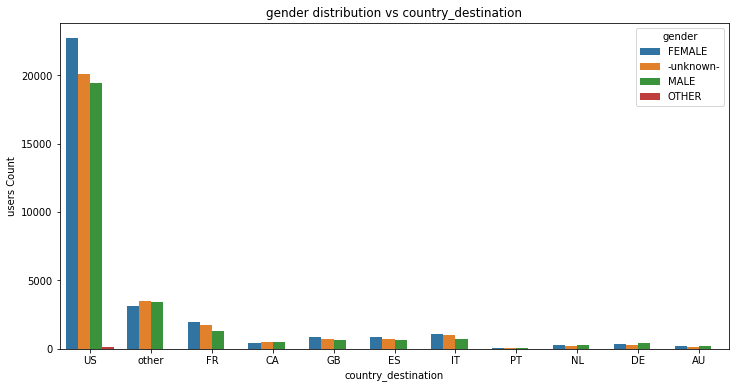

In [ ]:
data_b=data_1[data_1['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='gender', data=data_b)
plt.ylabel('users Count')
plt.title('gender distribution')
plt.show()

data_b=data_1[data_1['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=data_b,hue='gender')
plt.ylabel('users Count')
plt.title('gender distribution vs country_destination')
plt.show()

From the above plot we can not get much informaion.

**User signup method**

No handles with labels found to put in legend.


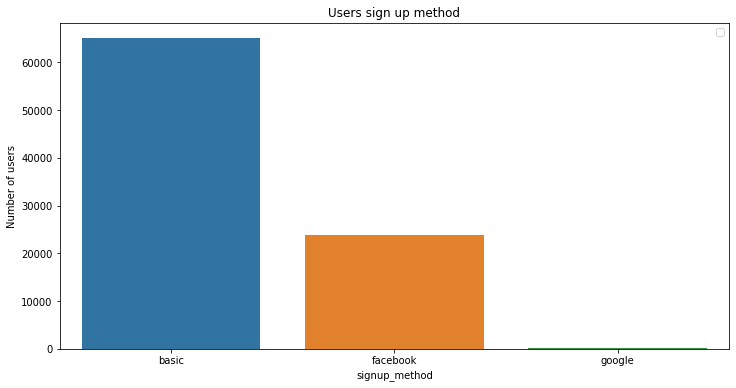

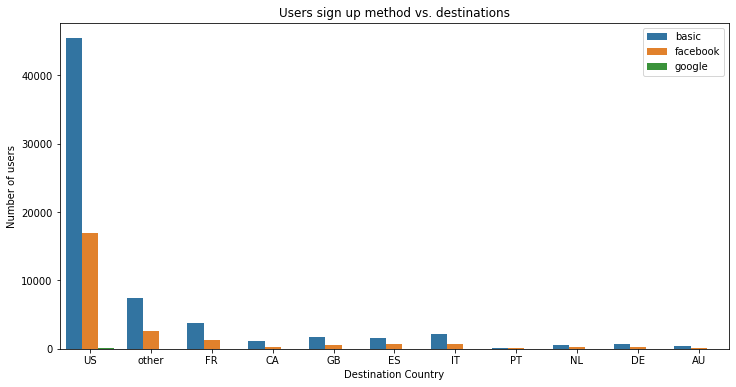

In [ ]:
#Considering those users who made atleast 1 booking.
df_without_NDF=data_1[data_1['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='signup_method', data = df_without_NDF)
plt.xlabel('signup_method')
plt.ylabel('Number of users')
plt.title('Users sign up method')
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data = df_without_NDF, hue = 'signup_method')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Users sign up method vs. destinations')
plt.legend(loc='upper right')
plt.show()



User signup method distribution is almost same for all users, where Basic is highest for all countries.

**Signup app distribution**

No handles with labels found to put in legend.


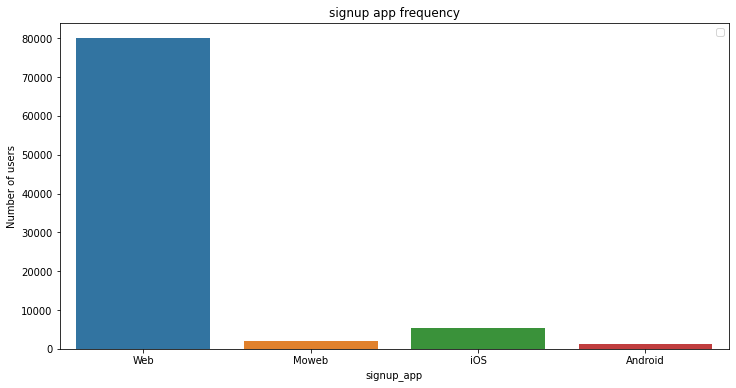

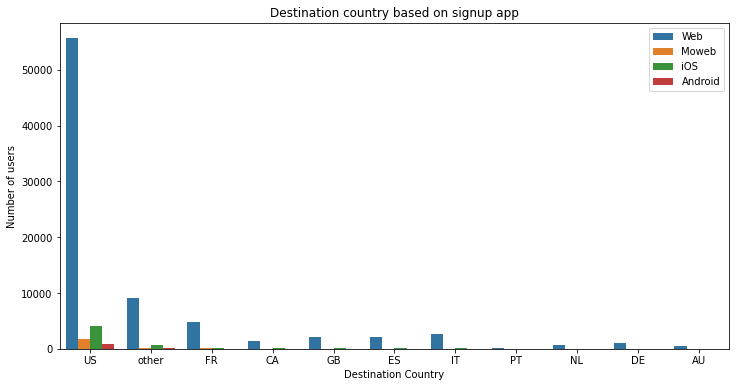

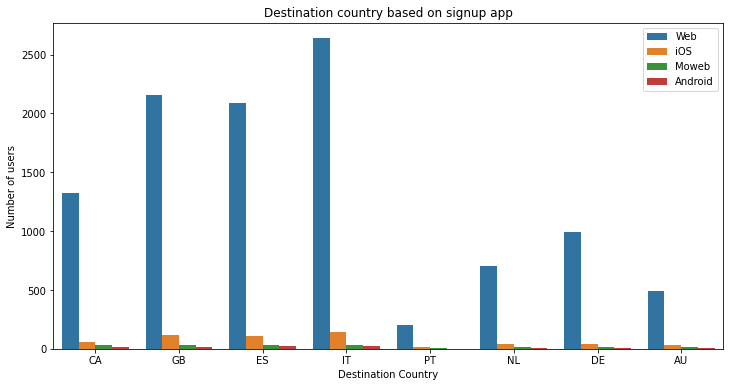

In [ ]:
#Considering those users who made atleast 1 booking.
plt.figure(figsize=(12,6))
sns.countplot(x='signup_app', data=df_without_NDF)
plt.xlabel('signup_app')
plt.ylabel('Number of users')
plt.title('signup app frequency')
plt.legend(loc = 'upper right')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF, hue='signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destination country based on signup app')
plt.legend(loc = 'upper right')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF[~df_without_NDF['country_destination'].isin(['US','FR','other'])], hue='signup_app')
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destination country based on signup app')
plt.legend(loc = 'upper right')
plt.show()


From the above plot, we have observed that the maximum user signed up through direct airbnb website for each of the countries.

**Affiliate Channel (what kind of paid marketing)**

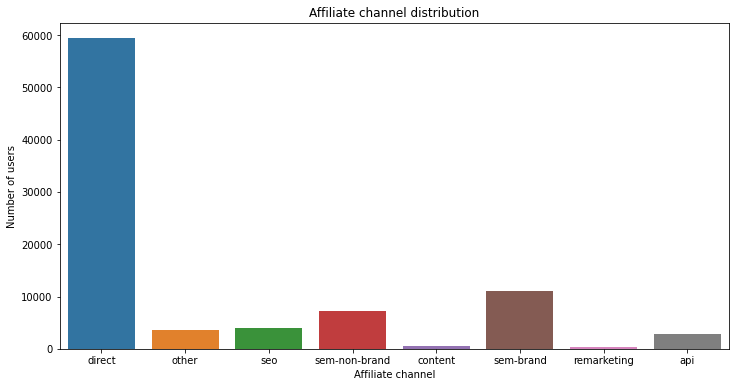

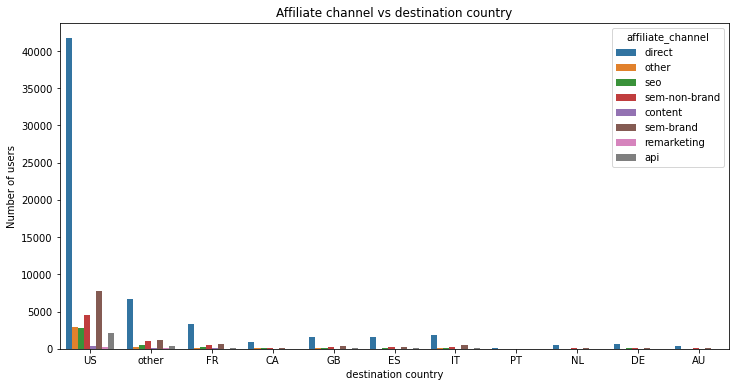

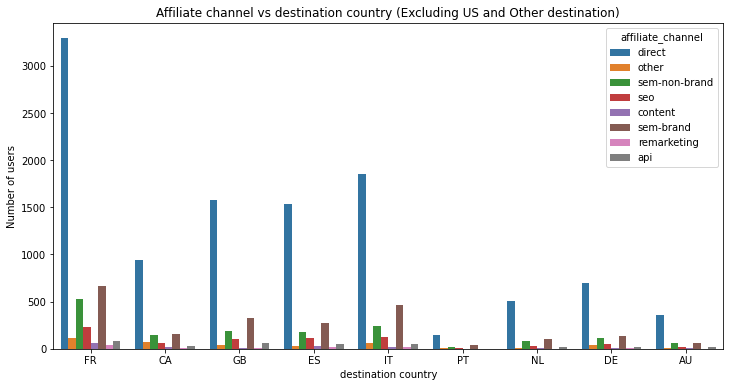

In [ ]:
#Considering those users who made atleast 1 booking.
plt.figure(figsize=(12,6))
sns.countplot(x='affiliate_channel', data=df_without_NDF)
plt.xlabel('Affiliate channel')
plt.ylabel('Number of users')
plt.title('Affiliate channel distribution')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF,hue='affiliate_channel')
plt.xlabel('destination country')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs destination country')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=df_without_NDF[~df_without_NDF['country_destination'].isin(['other','US'])],hue='affiliate_channel')
plt.xlabel('destination country')
plt.ylabel('Number of users')
plt.title('Affiliate channel vs destination country (Excluding US and Other destination)')
plt.show()

From the above plot we observed that the maximum users have come directly to the airbnb website.

**Affiliate Provider (where the marketing is e.g. google, craigslist, other)**

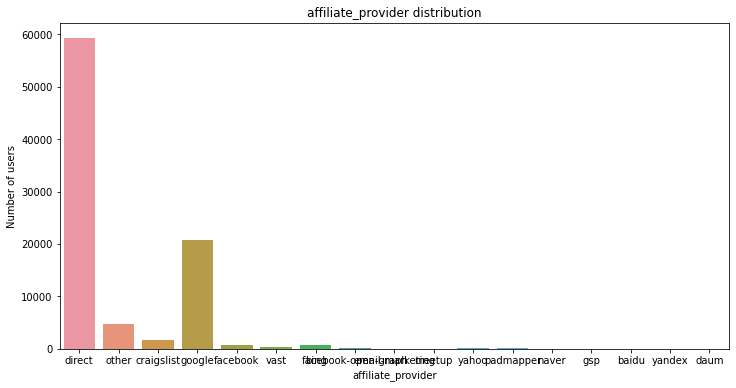

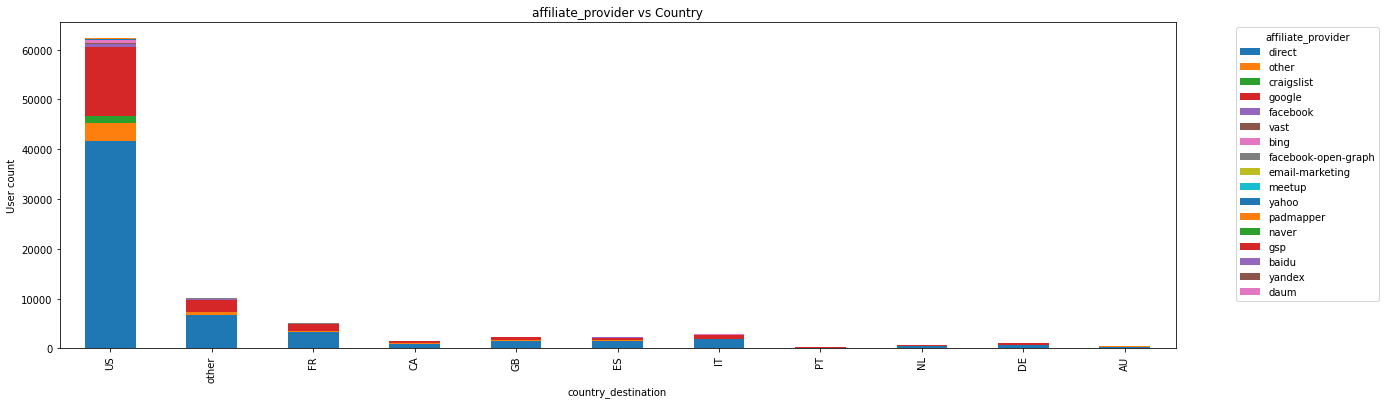

Text(0, 0.5, 'User count')

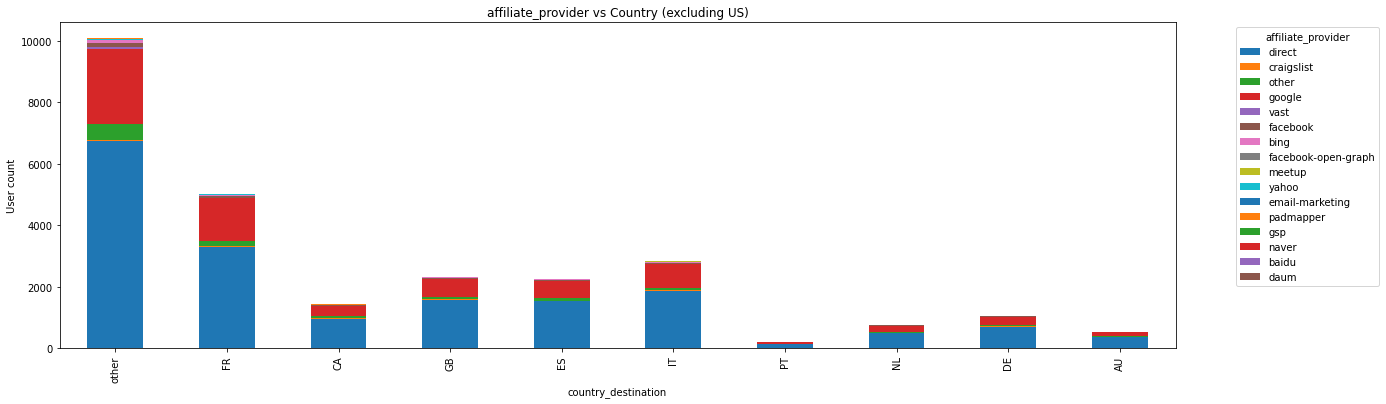

In [ ]:
#Considering those users who made atleast 1 booking.
df_without_NDF=data_1[data_1['country_destination']!='NDF']
plt.figure(figsize=(12,6))
sns.countplot(x='affiliate_provider', data=df_without_NDF)
plt.xlabel('affiliate_provider')
plt.ylabel('Number of users')
plt.title('affiliate_provider distribution')
plt.show()

def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()
    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys] for key in column_keys }
    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)
    return aggdf

aggregate('country_destination','affiliate_provider',df_without_NDF).plot(kind='bar',stacked=True,figsize=(20, 6))
plt.legend(title='affiliate_provider', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('User count')
plt.title('affiliate_provider vs Country')
plt.show()

aggregate('country_destination','affiliate_provider',df_without_NDF[~df_without_NDF['country_destination'].isin(['US'])]).plot(kind='bar',stacked=True,figsize=(20, 6))
plt.legend(title='affiliate_provider', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('affiliate_provider vs Country (excluding US)')
plt.ylabel('User count')

From the above plots, Maximum users directly arrived at airbnb website and after that throught the ads shown over google

**First device type Analysis**

No handles with labels found to put in legend.


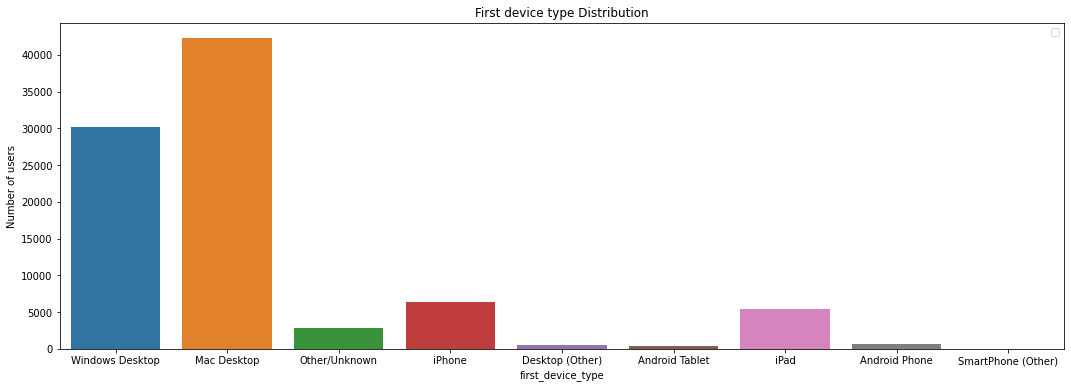

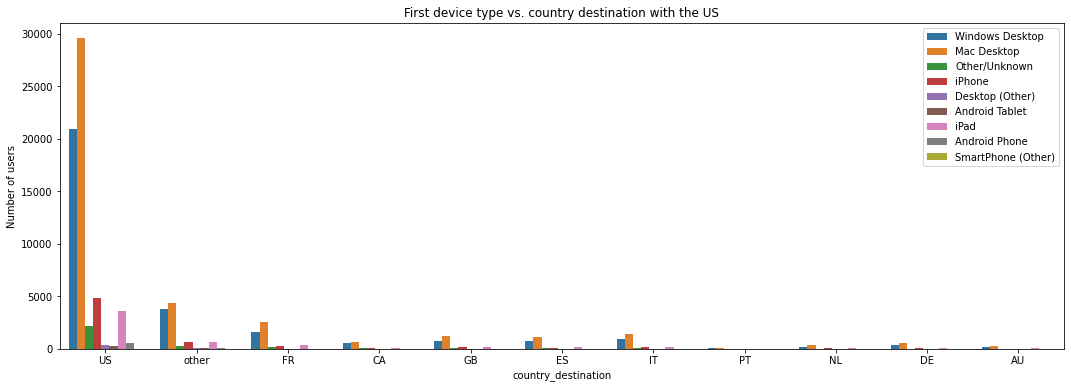

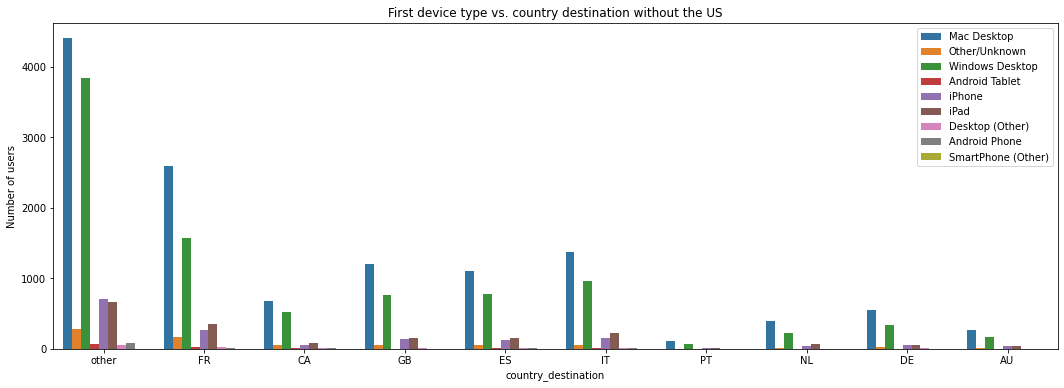

In [ ]:
df_without_NDF_US = df_without_NDF[df_without_NDF['country_destination']!='NDF']
plt.figure(figsize=(18,6))
sns.countplot(x='first_device_type', data=df_without_NDF_US)
plt.ylabel('Number of users')
plt.title('First device type Distribution')
plt.legend(loc = 'upper right')
plt.show()

df_without_NDF_US = df_without_NDF[df_without_NDF['country_destination']!='NDF']
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination with the US')
plt.legend(loc = 'upper right')
plt.show()

df_without_NDF_US = data_1[(data_1['country_destination']!='US') & (data_1['country_destination']!='NDF')]
plt.figure(figsize=(18,6))
sns.countplot(x='country_destination', data=df_without_NDF_US, hue='first_device_type')
plt.ylabel('Number of users')
plt.title('First device type vs. country destination without the US')
plt.legend(loc = 'upper right')
plt.show()

**First Browser**

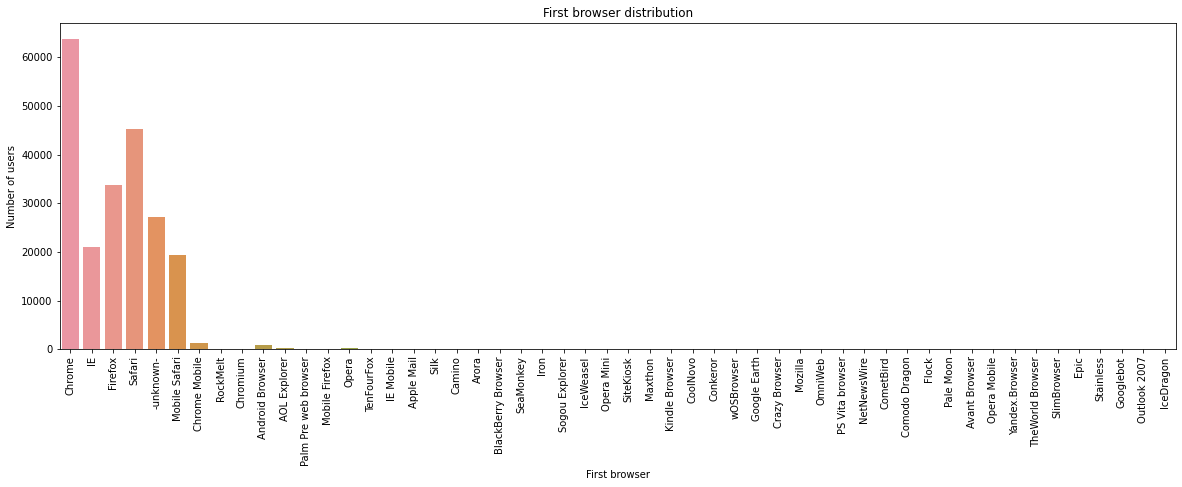

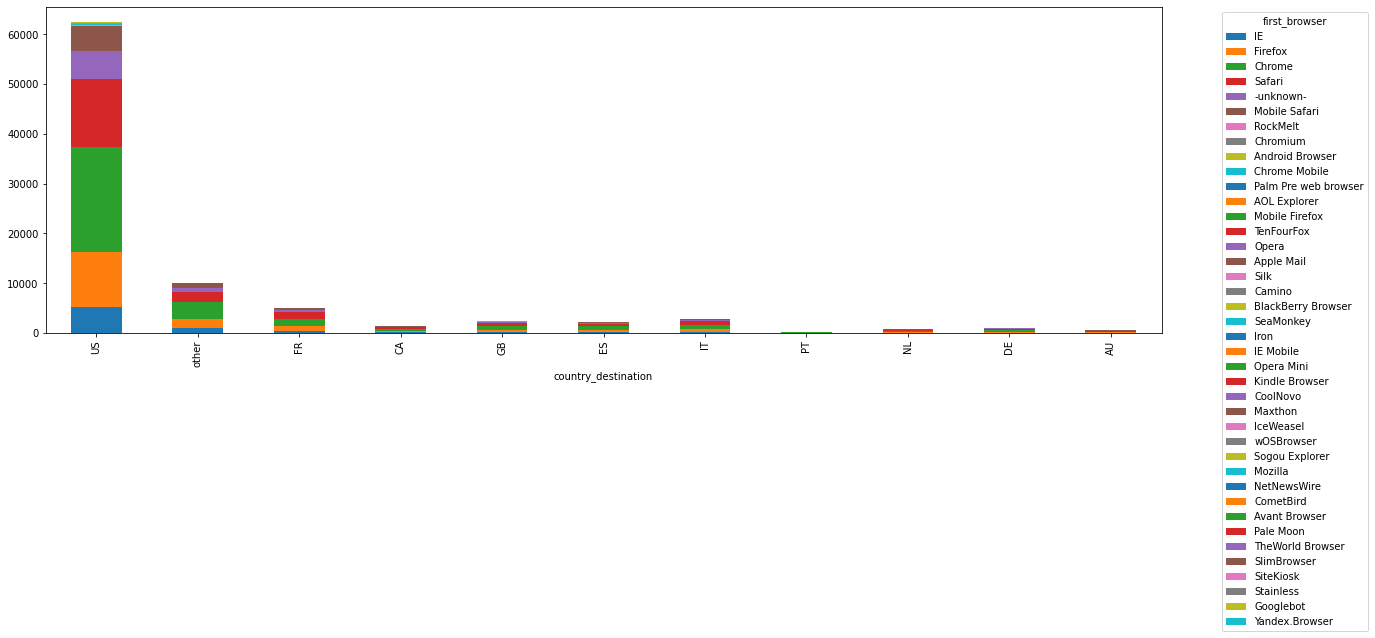

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='first_browser', data=data_1)
plt.xlabel('First browser')
plt.ylabel('Number of users')
plt.title('First browser distribution')
plt.xticks(rotation=90)
plt.show()


#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue/50319805
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

aggregate('country_destination','first_browser',data_1[data_1['country_destination']!='NDF']).plot(kind='bar',stacked=True,figsize=(20, 6))
#plt.legend(loc='upper right')
plt.legend(title='first_browser', bbox_to_anchor=(1.05, 1), loc='upper left')


Maximum users prefering chrome and safari browser in each country.

**Prefered Language**

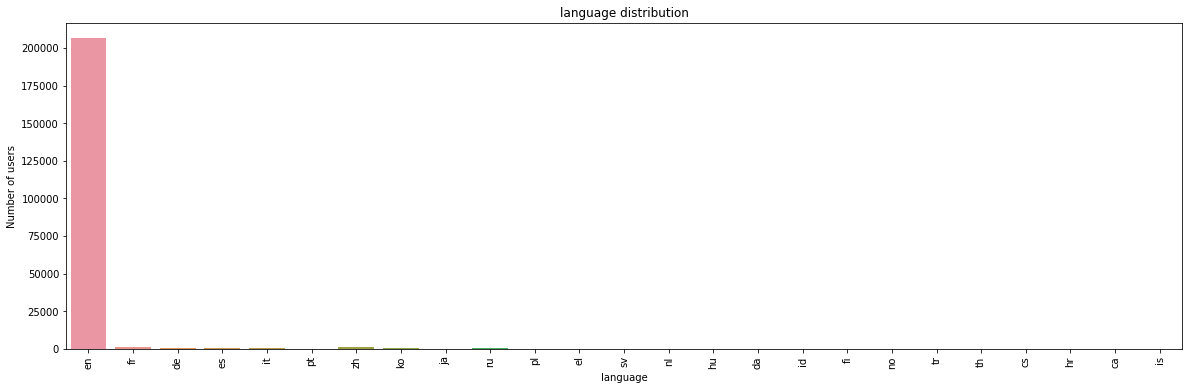

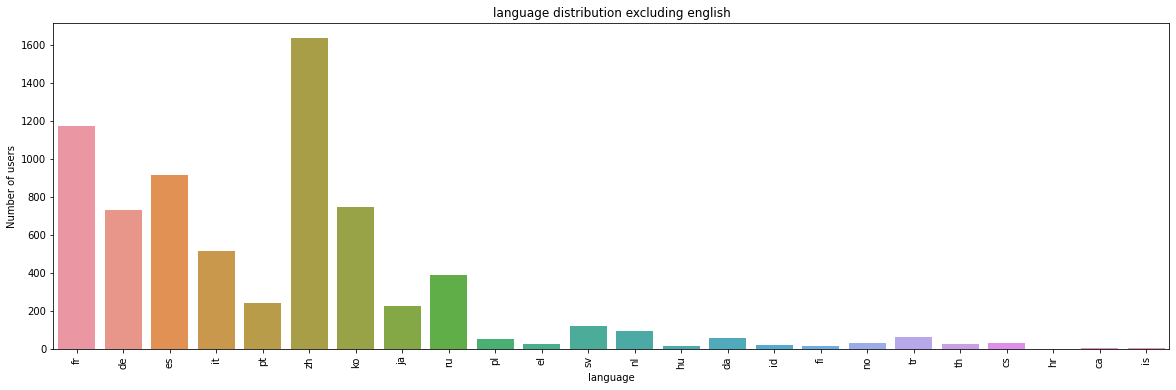

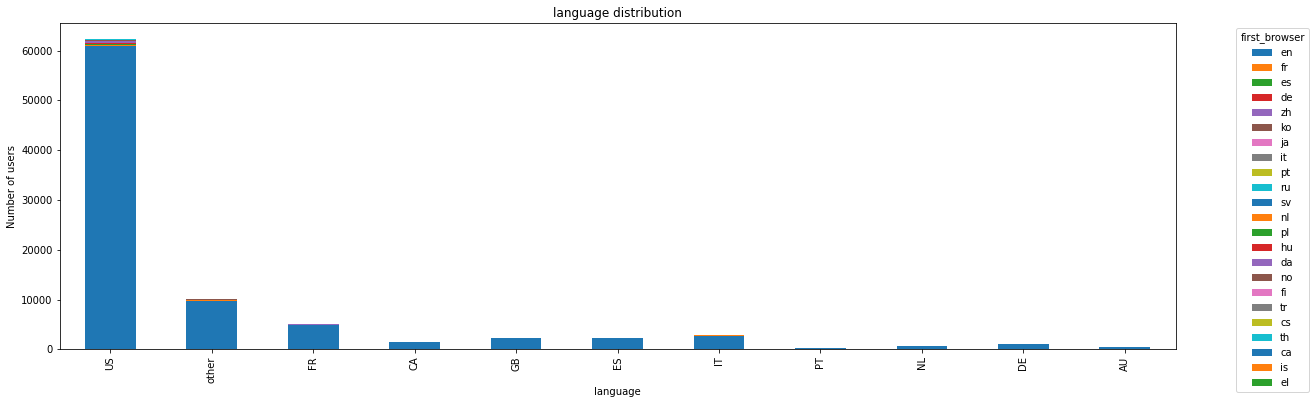

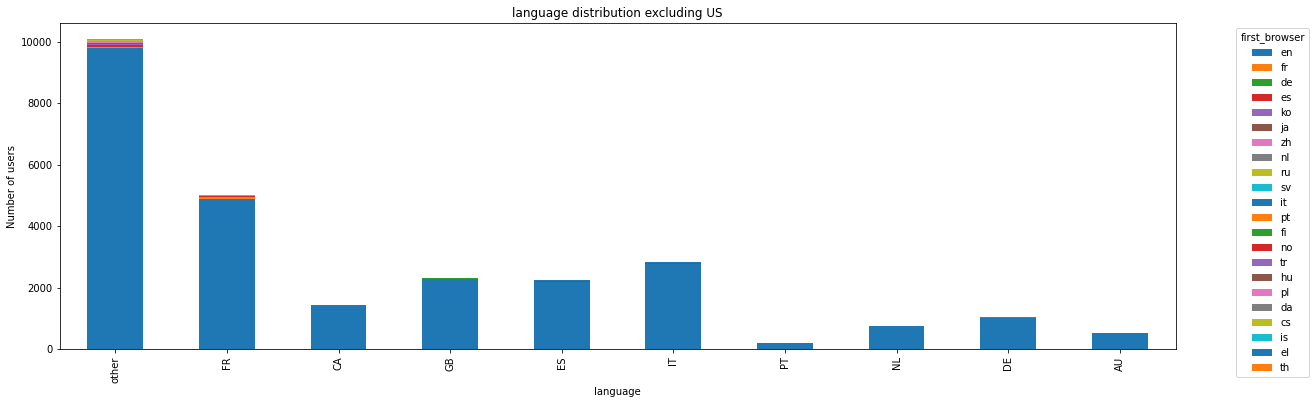

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x='language', data=data_1)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('language distribution')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20,6))
sns.countplot(x='language', data=data_1[data_1['language']!='en'])
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('language distribution excluding english')
plt.xticks(rotation=90)
plt.show()

'''
plt.figure(figsize=(12,24))
sns.countplot(data=data_1,y = 'country_destination',hue = 'language',saturation=1,linewidth=2)
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('language distribution vs country destination')
plt.show()
'''

#https://stackoverflow.com/questions/50319614/count-plot-with-stacked-bars-per-hue/50319805
def aggregate(rows,columns,df):
    column_keys = df[columns].unique()
    row_keys = df[rows].unique()

    agg = { key : [ len(df[(df[rows]==value) & (df[columns]==key)]) for value in row_keys]
               for key in column_keys }

    aggdf = pd.DataFrame(agg,index = row_keys)
    aggdf.index.rename(rows,inplace=True)

    return aggdf

    

#aggregate('country_destination','language',data_1).plot(kind='bar',stacked=True)
aggregate('country_destination','language',data_1[data_1['country_destination']!='NDF']).plot(kind='bar',stacked=True,figsize=(20, 6))
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('language distribution')
plt.legend(title='first_browser', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


aggregate('country_destination','language',data_1[~data_1['country_destination'].isin(['NDF','US'])]).plot(kind='bar',stacked=True,figsize=(20, 6))
plt.xlabel('language')
plt.ylabel('Number of users')
plt.title('language distribution excluding US')
plt.legend(title='first_browser', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



From the above plot, we observed that the almost 95% users prefered language is english.

**Account creation date analysis**

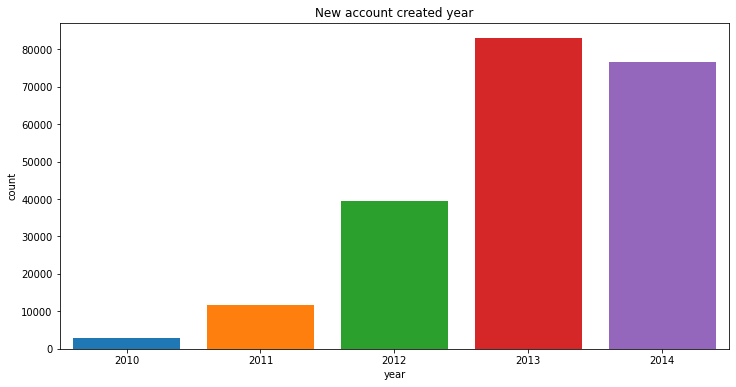

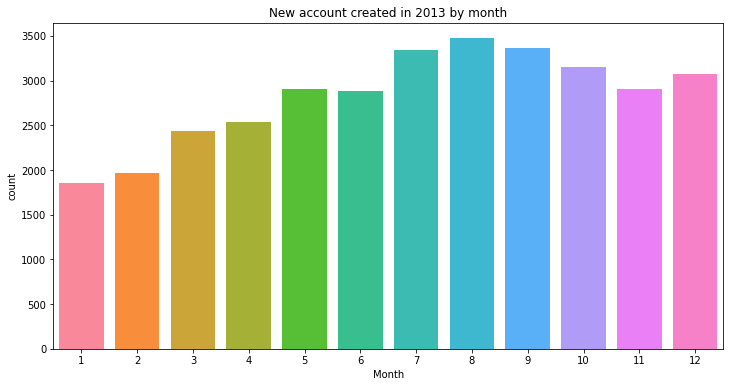

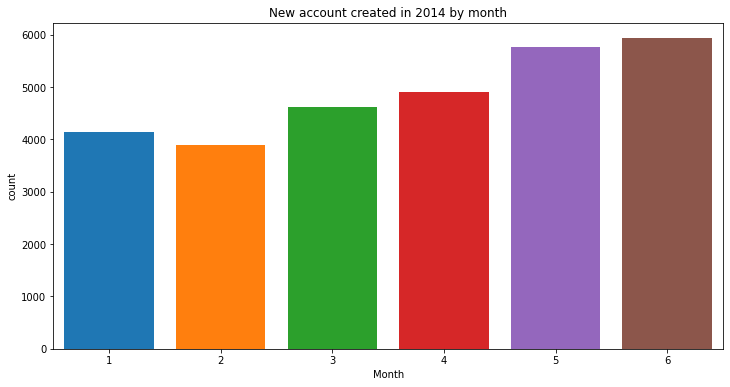

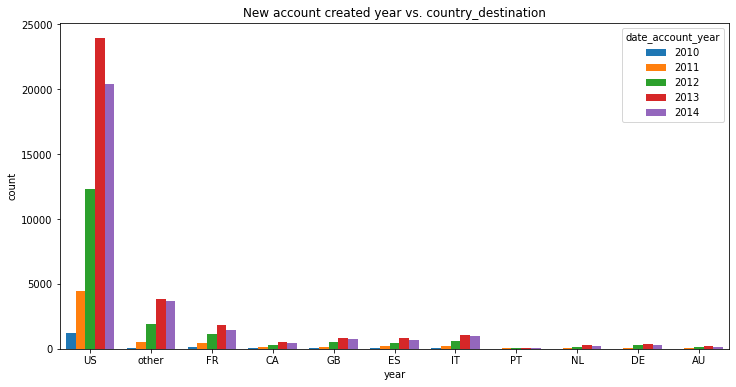

In [ ]:
df_without_NDF=data_1
df_without_NDF['date_account_year'] = pd.to_datetime(df_without_NDF['date_account_created']).dt.year
plt.figure(figsize=(12,6))
sns.countplot(data=df_without_NDF,x = 'date_account_year',saturation=1,linewidth=2)
plt.xlabel('year')
plt.title('New account created year')
plt.show()

df_without_NDF=data_1[(data_1['country_destination']!='NDF') & (pd.to_datetime(data_1['date_account_created']).dt.year==2013)]
df_without_NDF['date_account_month'] = pd.to_datetime(df_without_NDF['date_account_created']).dt.month
plt.figure(figsize=(12,6))
sns.countplot(data=df_without_NDF,x = 'date_account_month',saturation=1,linewidth=2)
plt.xlabel('Month')
plt.title('New account created in 2013 by month')
plt.show()



df_without_NDF=data_1[data_1['country_destination']!='NDF']
df_without_NDF['date_account_year'] = pd.to_datetime(df_without_NDF['date_account_created']).dt.year
plt.figure(figsize=(12,6))
sns.countplot(data=df_without_NDF,x = 'country_destination',hue = 'date_account_year',saturation=1,linewidth=2)
plt.xlabel('year')
plt.title('New account created year vs. country_destination')
plt.show()

From the above plot, New users acounts creation has been increased in July and August in 2013, might be it started became popular in 2013.

**Country Destination (Target variable or dependent variable)**

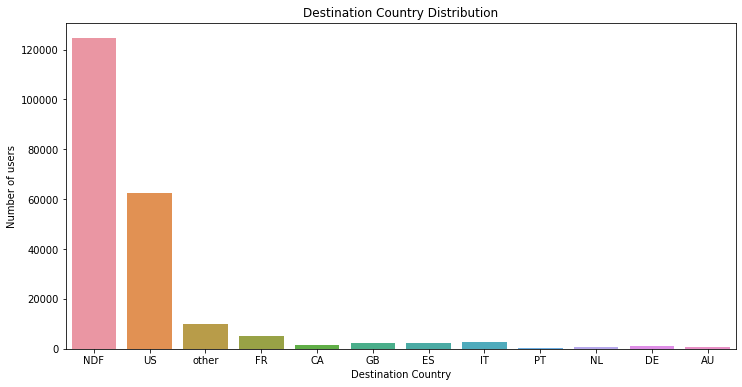

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='country_destination', data=data_1)
plt.xlabel('Destination Country')
plt.ylabel('Number of users')
plt.title('Destination Country Distribution')
plt.show()

In [ ]:
'''
y_true=[1,1,1,1,1,1,1,1,1,0]
y_pred=[1,1,1,1,1,1,1,1,1,1]

from sklearn.metrics import f1_score
print(f1_score(y_true,y_pred,average='micro'))
print(f1_score(y_true,y_pred,average='macro'))
'''

**4.2 EDA for Session.csv file (Analysing after removing test data user id's)**

In [ ]:
#Analysing after removing test data user id's
#Reading session file
data_2=pd.read_csv('sessions.csv')
test_user_id=pd.read_csv('test_users.csv')
a=test_user_id['id'].values
data_2= data_2[~data_2['user_id'].isin(a)]
print('Number of data points : ', data_2.shape[0])
print('Number of unique user id : ',len(data_2['user_id'].unique()))
print('Number of features : ', data_2.shape[1])
print('Features : ', data_2.columns.values)

data_2.head()

Number of data points :  5572453
Number of unique user id :  73816
Number of features :  6
Features :  ['user_id' 'action' 'action_type' 'action_detail' 'device_type'
 'secs_elapsed']


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


**Null Value Analysis**

user_id           34496
action            51678
action_type      623107
action_detail    623107
device_type           0
secs_elapsed      74363
dtype: int64 

user_id null value percentage :  0.6190451494162444 %

action null value percentage :  0.9273833265170653 %

action_type null value percentage :  11.181915755951643 %

action_detail null value percentage :  11.181915755951643 %

secs_elapsed null value percentage :  1.3344751404812207 %



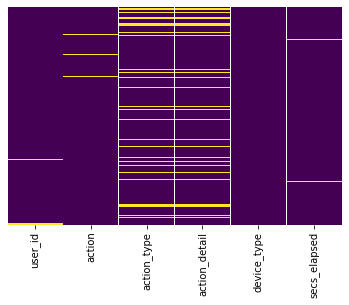

In [ ]:
#Null value Analysis
sns.heatmap(data_2.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(data_2.isnull().sum(),'\n')
print('user_id null value percentage : ',(data_2['user_id'].isnull().sum()/len(data_2['user_id'].isnull())*100),'%\n')
print('action null value percentage : ',(data_2['action'].isnull().sum()/len(data_2['action'].isnull())*100),'%\n')
print('action_type null value percentage : ',(data_2['action_type'].isnull().sum()/len(data_2['action_type'].isnull())*100),'%\n')
print('action_detail null value percentage : ',(data_2['action_detail'].isnull().sum()/len(data_2['action_detail'].isnull())*100),'%\n')
print('secs_elapsed null value percentage : ',(data_2['secs_elapsed'].isnull().sum()/len(data_2['secs_elapsed'].isnull())*100),'%\n')

**Unique categorical feature analysis (Mentioned those feature which contain unknown values)**

In [ ]:
# Unique categorical feature analysis (Mentioned those feature which contain unknown values) 
print('action_type : ',len(data_2[data_2['action_type']!=np.nan]['action_type'].unique()),'\n') # Contain unknown value
print('action_detail : ',len(data_2[data_2['action_detail']!=np.nan]['action_detail'].unique()),'\n') 
print('device_type : ',len(data_2[data_2['device_type']!=np.nan]['device_type'].unique()),'\n')
print('action : ',len(data_2[data_2['action']!=np.nan]['action'].unique()),'\n')


action_type :  11 

action_detail :  140 

device_type :  14 

action :  335 

secs_elapsed :  257238 



**secs_elapsed**

In [ ]:
for i in range(90,101):
  print(i,'percentile :', data_2.secs_elapsed.quantile(i/100))

90 percentile : 35822.0
91 percentile : 40575.0
92 percentile : 46417.0
93 percentile : 53781.0
94 percentile : 63502.0
95 percentile : 77030.0
96 percentile : 96898.87999999896
97 percentile : 129443.33000000007
98 percentile : 193074.0
99 percentile : 372556.990000003
100 percentile : 1799977.0


count    5.498090e+06
mean     2.043902e+04
std      9.254198e+04
min      0.000000e+00
25%      2.360000e+02
50%      1.138000e+03
75%      8.496000e+03
max      1.799977e+06
Name: secs_elapsed, dtype: float64


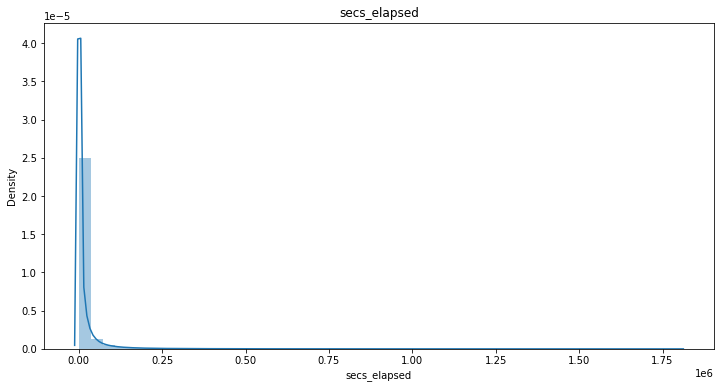

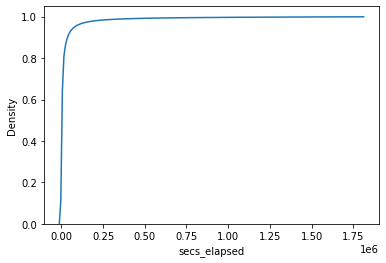

In [ ]:
#a=data_2[data_2['secs_elapsed']<10000]
print(data_2.secs_elapsed.describe())
plt.figure(figsize=(12,6))
sns.distplot(data_2.secs_elapsed.dropna())
plt.title('secs_elapsed')
plt.show()
sns.kdeplot(data=data_2, x="secs_elapsed", cumulative=True, common_norm=False, common_grid=True)
plt.show()


Above plot contain value from 0 to 10**6, but it is fine, because it can be possible that the users spend this much time to make decison.

**Comparing session user id and train_user_2 user_id's**

In [ ]:
merge_data_1_2=data_1.merge(data_2,left_on='id',right_on='user_id',how='inner')
merge_data_1_2.sort_values(by='timestamp_first_active').head()
print('Common data between user data and session data is : ', (len(merge_data_1_2['id'].unique())/len(data_1))*100,'%' )

Common data between user data and session data is :  34.581707277079985 %


**Device type**

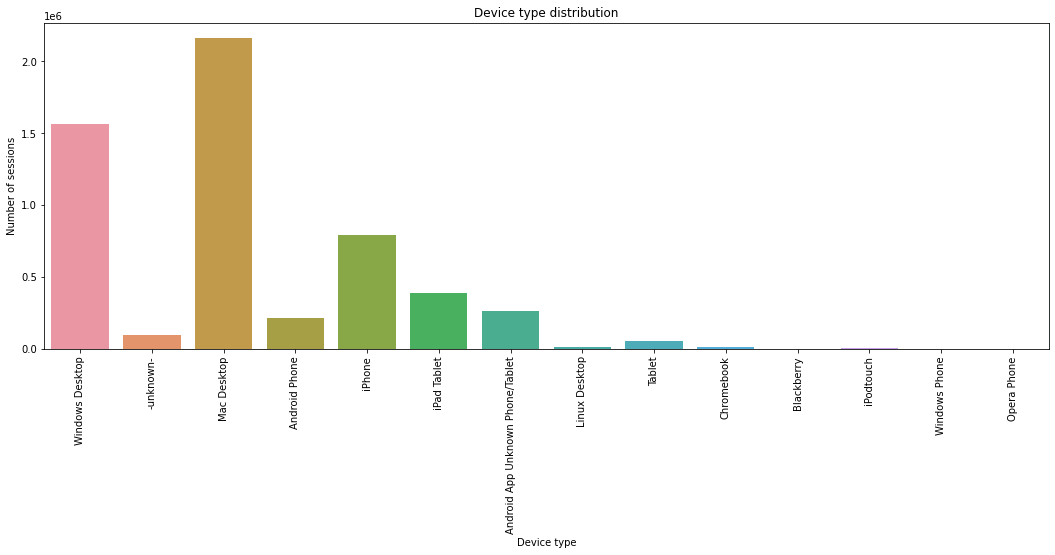

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='device_type', data=data_2)
plt.xlabel('Device type')
plt.ylabel('Number of sessions')
plt.title('Device type distribution')
plt.xticks(rotation=90)
plt.show()

As we have seen maximum users first device is mac desktop, session data also showing the same behaviour as the maximum users have done booking through Mac Desktop.

**Multivariate Anaysis**

Age vs. gender by country

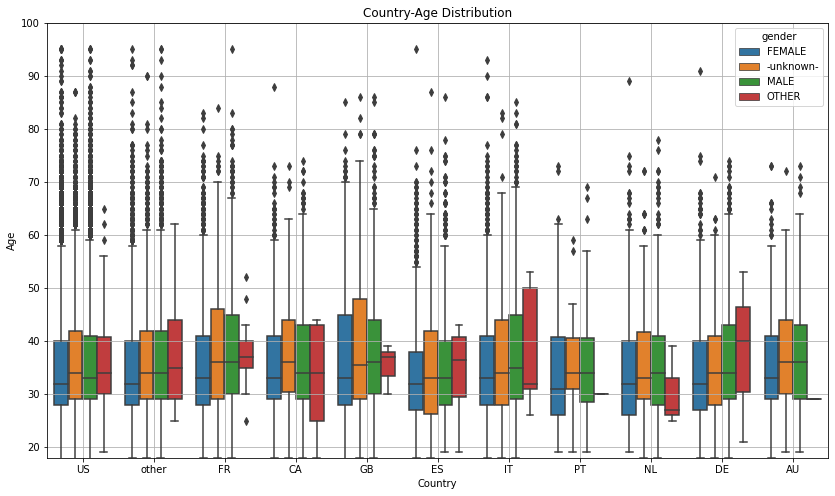

In [ ]:
df_without_NDF = df_without_NDF[df_without_NDF['country_destination']!='NDF']
plt.figure(figsize=[14,8])
sns.boxplot(data=df_without_NDF,y='age',x='country_destination',hue='gender');
plt.grid(True)
plt.ylim(18,100)
plt.xlabel('Country');
plt.ylabel('Age');
plt.title('Country-Age Distribution');

1. From the above plot, age between 25 to 30 of Other category users prefer to visit CA and NL countries and the age group between 45 to 50 prefer to visit IT.
2. Females of Age between 25 to 30 prefer to visit PT and NL.


**Conclusive Take away from the Datasets :**

1. From all the features in the 1st dataset, Age, first_affiliate_tracked and date_first_booking  contain 41%, 2% and 58% Null values. 
   so we probably drop the date_first_booking as it is not giving much inforation and for age and first_affiliate_tracked feature,
   we can use imputing technique to fill the Null values.
2. Age feature contain minimum value is 1 and maximum values is 2014, so considering age, these values are invalid, it might be the current year or birth year.
   it is not possible to identiy age, birth year and current year, so we can fix the age limit from 15 to 95.
3. In the age feature, ES and PT can be seperable at some level, users having ages between 30 to 34 years prefer these as destination country.
4. Age between 25 to 30 of Other category users prefer to visit CA and NL countries and the age group between 45 to 50 prefer to visit IT.
5. Females of Age between 25 to 30 prefer to visit PT and NL.
6. There is sudden increase in account creation and the travel booking in July, August in 2013, Might be the Airbnb became famous in 2013.
7. Most of the users prefer to travel within US only and least user choose to travel to PT, Might be the PT is costier than the other countries, so there is imbalance in Class distribution.
8. As we know, This file contain multiple records for each user, so total unique users excluding test users is 73816


## **5. Feature Engineering and Data preprocessing**

**User Dataset train_users_2 :**

In [ ]:
#Extraction of weekday_account_created, day_account_created, month_account_created,year_account_created for date_account_created and date_first_booking features.
#train 
data_1=pd.read_csv('train_users_2.csv')
#datetime conversion
data_1['date_account_created'] = pd.to_datetime(data_1['date_account_created'])
data_1['timestamp_first_active'] = pd.to_datetime((data_1.timestamp_first_active // 1000000), format='%Y%m%d')
#year,month, day, date extration
data_1['weekday_account_created'] = data_1.date_account_created.dt.day_name()
data_1['day_account_created'] = data_1.date_account_created.dt.day
data_1['month_account_created'] = data_1.date_account_created.dt.month_name()
data_1['year_account_created'] = data_1.date_account_created.dt.year
data_1['weekday_first_active'] = data_1.timestamp_first_active.dt.day_name()
data_1['day_first_active'] = data_1.timestamp_first_active.dt.day
data_1['month_first_active'] = data_1.timestamp_first_active.dt.month_name()
data_1['year_first_active'] = data_1.timestamp_first_active.dt.year
#time gap between date_account_created and first_active
data_1['time_gap']=(data_1['date_account_created'] - data_1['timestamp_first_active']).apply(lambda l: l.days)


#test
data_1_test=pd.read_csv('test_users.csv')
data_1_test['date_account_created'] = pd.to_datetime(data_1_test['date_account_created'])
data_1_test['timestamp_first_active'] = pd.to_datetime((data_1_test.timestamp_first_active // 1000000), format='%Y%m%d')
data_1_test['weekday_account_created'] = data_1_test.date_account_created.dt.day_name()
data_1_test['day_account_created'] = data_1_test.date_account_created.dt.day
data_1_test['month_account_created'] = data_1_test.date_account_created.dt.month_name()
data_1_test['year_account_created'] = data_1_test.date_account_created.dt.year
data_1_test['weekday_first_active'] = data_1_test.timestamp_first_active.dt.day_name()
data_1_test['day_first_active'] = data_1_test.timestamp_first_active.dt.day
data_1_test['month_first_active'] = data_1_test.timestamp_first_active.dt.month_name()
data_1_test['year_first_active'] = data_1_test.timestamp_first_active.dt.year
data_1_test['time_gap']=(data_1_test['date_account_created'] - data_1_test['timestamp_first_active']).apply(lambda l: l.days)



**Age**

In [ ]:
#train
#data_1=pd.read_csv('train_users_2.csv')
data_1['date_first_booking'] = pd.to_datetime(data_1['date_first_booking'])
data_1['year_date_first_booking'] = data_1.date_first_booking.dt.year
#age field which contain values in 19's series and date_first_booking is not null then will take the difference of the age and date_first_booking year.
date_first_booking=data_1[(data_1.age>1000) & (data_1.age<2000) & ~data_1.date_first_booking.isnull() ][['year_date_first_booking']]
age=data_1[(data_1.age>1000) & (data_1.age<2000) & ~data_1.date_first_booking.isnull() ][['age']]
data_1.loc[((data_1.age>1000) & (data_1.age<2000) & (~data_1.date_first_booking.isnull())),'age' ]=date_first_booking['year_date_first_booking']-age['age']
#************************************************************************************************************************************************************
data_1['date_account_created'] = pd.to_datetime(data_1['date_account_created'])
data_1['year_date_account_created'] = data_1.date_account_created.dt.year
#age field which contain values in 19's series and date_account_created is not null then will take the difference of the age and date_account_created year.
year_date_account_created=data_1[(data_1.age>1000) & (data_1.age<2000) & ~data_1.date_account_created.isnull() ][['year_date_account_created']]
age=data_1[(data_1.age>1000) & (data_1.age<2000) & ~data_1.date_account_created.isnull() ][['age']]
data_1.loc[((data_1.age>1000) & (data_1.age<2000) & (~data_1.date_account_created.isnull())),'age' ]=year_date_account_created['year_date_account_created']-age['age']
data_1.loc[(data_1['age']<15) | (data_1['age']>95),'age']=np.nan
data_1=data_1.drop(['date_first_booking','date_account_created','timestamp_first_active','year_date_account_created','year_date_first_booking'],axis=1)


#test
#data_1_test=pd.read_csv('train_users_2.csv')
data_1_test['date_first_booking'] = pd.to_datetime(data_1_test['date_first_booking'])
data_1_test['year_date_first_booking'] = data_1_test.date_first_booking.dt.year
#age field which contain values in 19's series and date_first_booking is not null then will take the difference of the age and date_first_booking year.
date_first_booking=data_1_test[(data_1_test.age>1000) & (data_1_test.age<2000) & ~data_1_test.date_first_booking.isnull() ][['year_date_first_booking']]
age=data_1_test[(data_1_test.age>1000) & (data_1_test.age<2000) & ~data_1_test.date_first_booking.isnull() ][['age']]
data_1_test.loc[((data_1_test.age>1000) & (data_1_test.age<2000) & (~data_1_test.date_first_booking.isnull())),'age' ]=date_first_booking['year_date_first_booking']-age['age']
#************************************************************************************************************************************************************
data_1_test['date_account_created'] = pd.to_datetime(data_1_test['date_account_created'])
data_1_test['year_date_account_created'] = data_1_test.date_account_created.dt.year
#age field which contain values in 19's series and date_account_created is not null then will take the difference of the age and date_account_created year.
year_date_account_created=data_1_test[(data_1_test.age>1000) & (data_1_test.age<2000) & ~data_1_test.date_account_created.isnull() ][['year_date_account_created']]
age=data_1_test[(data_1_test.age>1000) & (data_1_test.age<2000) & ~data_1_test.date_account_created.isnull() ][['age']]
data_1_test.loc[((data_1_test.age>1000) & (data_1_test.age<2000) & (~data_1_test.date_account_created.isnull())),'age' ]=year_date_account_created['year_date_account_created']-age['age']
data_1_test.loc[(data_1_test['age']<15) | (data_1_test['age']>95),'age']=np.nan
data_1_test=data_1_test.drop(['date_first_booking','date_account_created','timestamp_first_active','year_date_account_created','year_date_first_booking'],axis=1)
#Define age group
def set_age_group(x):
    if x < 40:
        return 'Young'
    elif x >=40 and x < 60:
        return 'Middle'
    elif x >= 60 and x <= 95:
        return 'Old'
    else:
        return 'Unknown_age'


data_1['age_group'] = data_1['age'].apply(set_age_group)
data_1_test['age_group'] = data_1_test['age'].apply(set_age_group)

#Replace NAN to unknown.
data_1[['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser']]=data_1[['gender','signup_method' ,'language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser']].fillna('-unknown-')
data_1[['signup_flow','age']]=data_1[['signup_flow','age']].fillna(0)
#Replace NAN to unknown.
data_1_test[['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser']]=data_1_test[['gender','signup_method' ,'language','affiliate_channel','affiliate_provider','first_affiliate_tracked','signup_app','first_device_type','first_browser']].fillna('-unknown-')
data_1_test[['signup_flow','age']]=data_1_test[['signup_flow','age']].fillna(0)


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
user_data=data_1[['id','country_destination','age','age_group','gender','signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser', 'weekday_account_created', 'day_account_created',
       'month_account_created', 'year_account_created', 'weekday_first_active','day_first_active', 'month_first_active', 
        'year_first_active','time_gap']]


        #weekday_account_created,day_account_created,month_account_created,weekday_first_active,day_first_active,month_first_active
user_data_test=data_1_test[['id','age','age_group','gender','signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked',
       'signup_app', 'first_device_type', 'first_browser','weekday_account_created', 'day_account_created',
       'month_account_created', 'year_account_created', 'weekday_first_active','day_first_active', 'month_first_active', 
        'year_first_active','time_gap']]


**Second Dataset session.csv :**

In [ ]:
from scipy.stats import skew,kurtosis
session_df = pd.read_csv("sessions.csv")
#Grouping multiple rows of dataframe with same user_id
session_df_group = session_df.groupby('user_id', as_index=False).agg(lambda x: x.tolist())

def conv_to_strings(items):
    items = [ str(i) for i in items ]
    items = [ re.sub('nan','',i) for i in items ] 
    items = ' '.join(items)
    return items
def conv_to_strings_unique(items):
    items = [ str(i) for i in items ]
    items = [ re.sub('nan','',i) for i in items ] 
    items = ' '.join(set(items))
    return items
def replace_nan_to_0(items):
    items = [ 0 if math.isnan(i) else i for i in items ] 
    return items


session_df_group['action_unique_count'] = session_df_group['action'].apply(lambda i : len(np.unique(i)))
session_df_group['action_type_unique_count'] = session_df_group['action_type'].apply(lambda i : len(np.unique(i)))
session_df_group['action_detail_unique_count'] = session_df_group['action_detail'].apply(lambda i : len(np.unique(i)))
session_df_group['device_type_unique_count'] = session_df_group['device_type'].apply(lambda i : len(np.unique(i)))

session_df_group['action'] = session_df_group['action'].apply(conv_to_strings)
session_df_group['action_type'] = session_df_group['action_type'].apply(conv_to_strings)
session_df_group['action_detail'] = session_df_group['action_detail'].apply(conv_to_strings)
session_df_group['device_type'] = session_df_group['device_type'].apply(conv_to_strings_unique)

session_df_group['secs_elapsed'] = session_df_group['secs_elapsed'].apply(replace_nan_to_0)
session_df_group['secs_elapsed_min'] = session_df_group['secs_elapsed'].apply(lambda i : np.min(i))
session_df_group['secs_elapsed_max'] = session_df_group['secs_elapsed'].apply(lambda i : np.max(i))
session_df_group['secs_elapsed_mean'] = session_df_group['secs_elapsed'].apply(lambda i : np.mean(i))
session_df_group['secs_elapsed_median'] = session_df_group['secs_elapsed'].apply(lambda i : np.median(i))
session_df_group['secs_elapsed_std'] = session_df_group['secs_elapsed'].apply(lambda i : np.std(i))
session_df_group['secs_elapsed_var'] = session_df_group['secs_elapsed'].apply(lambda i : np.var(i))
session_df_group['secs_elapsed_skew'] = session_df_group['secs_elapsed'].apply(lambda i : skew(i))
session_df_group['secs_elapsed_kurtosis'] = session_df_group['secs_elapsed'].apply(lambda i : kurtosis(i))
session_df_group['secs_elapsed'] = session_df_group['secs_elapsed'].apply(lambda i : np.sum(i))
session_df_group.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,action_unique_count,action_type_unique_count,action_detail_unique_count,device_type_unique_count,secs_elapsed_min,secs_elapsed_max,secs_elapsed_mean,secs_elapsed_median,secs_elapsed_std,secs_elapsed_var,secs_elapsed_skew,secs_elapsed_kurtosis
0,00023iyk9l,index dashboard header_userpic dashboard callb...,view view data view partner_callback message_p...,view_search_results dashboard header_userpic d...,Mac Desktop iPhone,867896.0,14,7,14,2,0.0,567165.0,21697.400000,843.0,89974.034721,8.095327e+09,5.604319,30.825760
1,0010k6l0om,search_results show personalize show search_re...,click view data click click data view partne...,view_search_results p3 wishlist_content_update...,Mac Desktop,586543.0,11,6,9,1,0.0,127898.0,9310.206349,847.0,22418.387678,5.025841e+08,3.550716,13.409583
2,001wyh0pz8,search search search show social_connections i...,click click click view data -unknown- view -un...,view_search_results view_search_results view_s...,Android App Unknown Phone/Tablet,282965.0,10,6,10,1,0.0,50548.0,3144.055556,1104.0,6504.785034,4.231223e+07,4.913642,29.798378
3,0028jgx1x1,show reviews show search show search reviews c...,view data view click view click data submit -u...,user_profile listing_reviews p3 view_search_re...,Android Phone -unknown-,297010.0,5,5,6,2,0.0,84636.0,9580.967742,489.0,17502.108866,3.063238e+08,2.864296,8.727197
4,002qnbzfs5,social_connections payment_methods create show...,data -unknown- -unknown- view data data data ...,user_social_connections -unknown- -unknown- us...,iPhone -unknown-,6487080.0,26,8,23,2,0.0,1418284.0,8221.901141,498.0,58037.687490,3.368373e+09,19.436206,446.526373


In [ ]:
#merging the train and sessions dataset 
final_df = data_1.merge(session_df_group, left_on='id', right_on='user_id', how='inner')
#Merging actual test dataset with session dataset
final_df_test = data_1_test.merge(session_df_group, left_on='id', right_on='user_id', how='left')
print('Test data shape : ',final_df_test.shape)
print('Test data shape : ',final_df.shape)

Test data shape :  (62096, 40)
Test data shape :  (73815, 41)


In [ ]:
#Applying Count Vectorizer (BOW and TFIDF)
import scipy.sparse as sp
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pickle as pkl

#def tokens(x): return x.split(',')

labels=final_df[['country_destination']]
categorical_columns=['action','action_type','action_detail','device_type','age_group','gender','signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked','signup_app', 'first_device_type', 'first_browser','weekday_account_created', 'day_account_created','month_account_created', 'weekday_first_active','day_first_active', 'month_first_active']
numerical_column=['action_unique_count','action_type_unique_count','action_detail_unique_count','device_type_unique_count','age','year_account_created','year_first_active','time_gap','secs_elapsed','secs_elapsed_min','secs_elapsed_max','secs_elapsed_mean','secs_elapsed_median','secs_elapsed_std','secs_elapsed_var','secs_elapsed_skew','secs_elapsed_kurtosis'] 

train = sp.coo_matrix((0,0))
test=sp.coo_matrix((0,0))
for i in categorical_columns:
  if i in ['action','action_type','action_detail','device_type']:
    cnt_vct=TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,1))
  else:
    cnt_vct=CountVectorizer(ngram_range=(1,1))

  cnt_vct.fit(final_df[i].apply(lambda j :str(j)))
  '''
  with open('drive/My Drive/vectorizer/cnt_vct_'+i+'.pkl', "wb" ) as f:
    pkl.dump(cnt_vct,f)
  f.close()
  '''
  categorical_columns_cnt_vct_train=cnt_vct.transform(final_df[i].apply(lambda j :str(j)))
  categorical_columns_cnt_vct_test=cnt_vct.transform(final_df_test[i].apply(lambda j :str(j)))
  train=sp.hstack((train, categorical_columns_cnt_vct_train))
  test=sp.hstack((test, categorical_columns_cnt_vct_test))
final_df=sp.hstack((train,sp.csr_matrix(final_df[numerical_column])))
final_df_test=sp.hstack((test,sp.csr_matrix(final_df_test[numerical_column])))


<h3>4. Test, Train and Cross Validation Split</h3>

<h4>4.1. Splitting data into train, test and cross validation</h4>

In [ ]:
y = labels 
X=final_df

# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3,random_state=43)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2,random_state=43)


<p> We split the data into train, test and cross validation data sets, preserving the ratio of class distribution in the original data set  </p>

In [ ]:
print('Number of data points in train data:', X_train.shape)
print('Number of data points in test data:', X_cv.shape)
print('Number of data points in train data:', X_test.shape)

Number of data points in train data: (41336, 615)
Number of data points in test data: (10334, 615)
Number of data points in train data: (22145, 615)


<h4>4.2. Distribution of y_i's in Train, Test and Cross Validation datasets</h4>

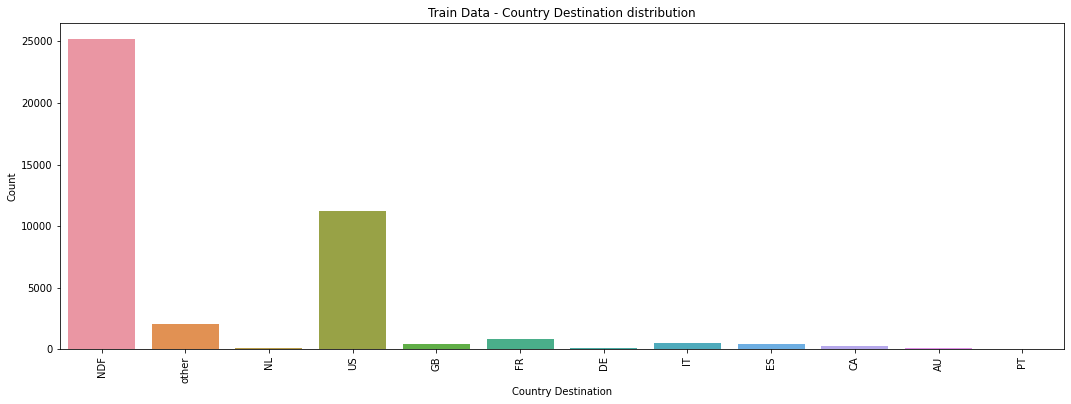

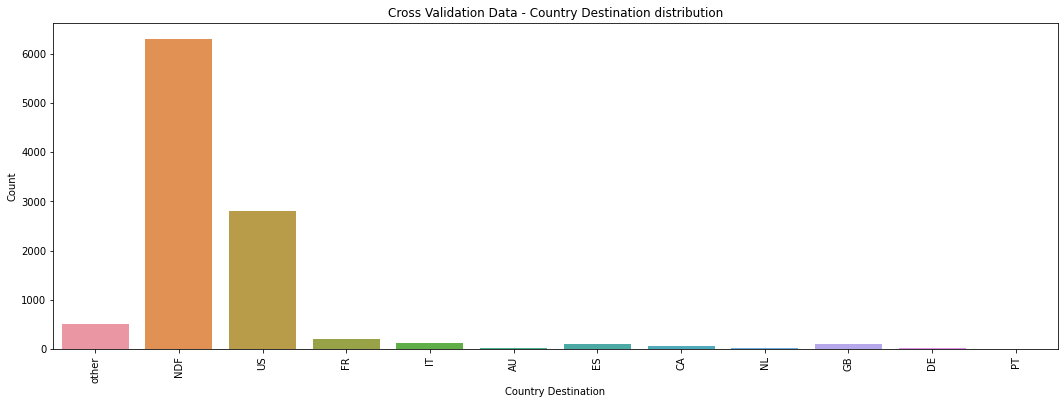

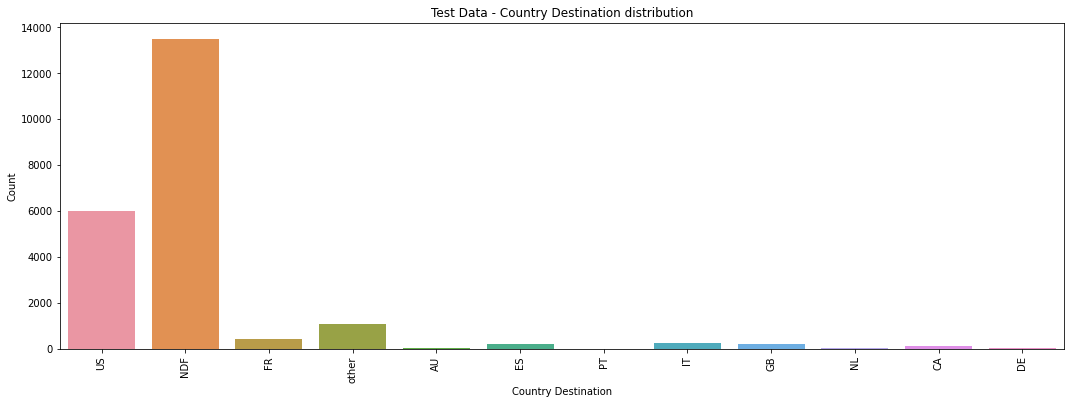

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x=y_train['country_destination'])
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.title('Train Data - Country Destination distribution')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(18,6))
sns.countplot(x=y_cv['country_destination'])
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.title('Cross Validation Data - Country Destination distribution')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(18,6))
sns.countplot(x=y_test['country_destination'])
plt.xlabel('Country Destination')
plt.ylabel('Count')
plt.title('Test Data - Country Destination distribution')
plt.xticks(rotation=90)
plt.show()

**4.3 labelling the target variable**

In [ ]:
# class labelling

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

le = LabelEncoder()
y_train=le.fit_transform(y_train)
y_cv=le.transform(y_cv)
y_test=le.transform(y_test)




# **Modeling**

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    %matplotlib inline 
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
   
    labels = [0,1,2,3,4,5,6,7,8,9,10,11]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))
    

In [ ]:
#NDGC Score
from sklearn.preprocessing import LabelBinarizer
def dcg_score(y_true, y_score, k=5):
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])
    gain = 2 ** y_true - 1
    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)

def ndcg_score(ground_truth, predictions, k=5):
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1]))
    T = lb.transform(ground_truth)
    scores = []
    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)
    return np.mean(scores)

**Random Forest**

log loss with alpha= 10 : 0.9720128134742922
NDGC Score of CV data : 0.8504434116598079


log loss with alpha= 50 : 0.951864264731217
NDGC Score of CV data : 0.8523006658878423


log loss with alpha= 100 : 0.9496912936282548
NDGC Score of CV data : 0.8525214842973701


log loss with alpha= 500 : 0.9478631512894121
NDGC Score of CV data : 0.8525538092391762


log_loss for c =  10 is 0.9720128134742922
log_loss for c =  50 is 0.951864264731217
log_loss for c =  100 is 0.9496912936282548
log_loss for c =  500 is 0.9478631512894121


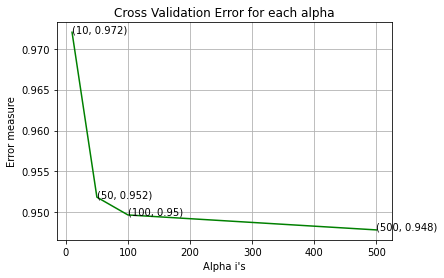

log loss for train data 0.28303735588607637
log loss for cv data 0.9478631512894121
log loss for test data 0.9466039262469534


In [ ]:
%matplotlib inline 


X_train_norm= X_train 
X_test_norm=X_test
X_cv_norm=X_cv 

alpha=[10,50,100,500]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train)
    predict_y = sig_clf.predict_proba(X_cv_norm)
    loss=log_loss(y_cv, predict_y, labels=sig_clf.classes_, eps=1e-15)
    print('log loss with alpha=',i,':',loss)
    print('NDGC Score of CV data :',ndcg_score(y_cv, sig_clf.predict_proba(X_cv_norm), k=5))
    print('\n')
    cv_log_error_array.append(loss)

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_norm,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_norm, y_train)


predict_y = sig_clf.predict_proba(X_train_norm)
print ('log loss for train data',(log_loss(y_train, predict_y, labels=sig_clf.classes_, eps=1e-15))) #,'and NDGC Score : ',ndcg_score(y_train, sig_clf.predict_proba(X_train_norm), k=5))

predict_y = sig_clf.predict_proba(X_cv_norm)
print ('log loss for cv data',(log_loss(y_cv, predict_y, labels=sig_clf.classes_, eps=1e-15))) #,'and NDGC Score : ',ndcg_score(y_cv, sig_clf.predict_proba(X_cv_norm), k=5))

predict_y = sig_clf.predict_proba(X_test_norm)
print ('log loss for test data',(log_loss(y_test, predict_y, labels=sig_clf.classes_, eps=1e-15))) #,'and NDGC Score : ',ndcg_score(y_test, sig_clf.predict_proba(X_test_norm), k=5))




**Logistic Regression**

log loss for c = 1e-05 is 0.9555262640736283
NDGC Score of CV data : 0.850430022783437


log loss for c = 0.0001 is 0.9503664609867933
NDGC Score of CV data : 0.8508430060581602


log loss for c = 0.001 is 0.9549984136647043
NDGC Score of CV data : 0.8484052791533139


log loss for c = 0.01 is 0.9791459406294502
NDGC Score of CV data : 0.8409885920946948


log loss for c = 0.1 is 1.0361556153956801
NDGC Score of CV data : 0.8335692923452597


log loss for c = 1 is 1.0806630065852991
NDGC Score of CV data : 0.820423035735301


log loss for c = 10 is 1.088390423475383
NDGC Score of CV data : 0.8201390431466979


log loss for c = 100 is 1.0891499982589263
NDGC Score of CV data : 0.8201390431466979


log loss for c = 1000 is 1.0892284989076844
NDGC Score of CV data : 0.8201390431466979




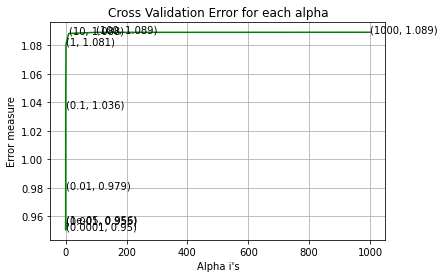

log loss for train data 1.0435247575730682
log loss for cv data 1.051010957591521
log loss for test data 1.0489709808426524


In [ ]:
from sklearn.linear_model import SGDClassifier
%matplotlib inline 

#Standardize
sc = MinMaxScaler()
X_train_norm = csr_matrix(sc.fit_transform(X_train.toarray()))
X_cv_norm = csr_matrix(sc.transform(X_cv.toarray()))
X_test_norm = csr_matrix(sc.transform(X_test.toarray()))



alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=SGDClassifier(loss="log", alpha=i,class_weight='balanced') #LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_norm,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train)
    predict_y = sig_clf.predict_proba(X_cv_norm)
    loss=log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15)
    print('log loss for c =',i,'is', loss)
    print('NDGC Score of CV data :',ndcg_score(y_cv, sig_clf.predict_proba(X_cv_norm), k=5))
    print('\n')
    cv_log_error_array.append(loss)

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_norm,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_norm, y_train)

predict_y = sig_clf.predict_proba(X_train_norm)
print ('log loss for train data',(log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15)))#,'and NDGC Score : ',ndcg_score(y_train, sig_clf.predict_proba(X_train_norm), k=5))

predict_y = sig_clf.predict_proba(X_cv_norm)
print ('log loss for cv data',(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))) #,'and NDGC Score : ',ndcg_score(y_cv, sig_clf.predict_proba(X_cv_norm), k=5))

predict_y = sig_clf.predict_proba(X_test_norm)
print ('log loss for test data',(log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))) #,'and NDGC Score : ',ndcg_score(y_test, sig_clf.predict_proba(X_test_norm), k=5))


**XgBoost Classifier**

log loss for c =  10 is 0.9440405613485823
NDGC Score : 0.8549563119315586


log loss for c =  50 is 0.9391685963053061
NDGC Score : 0.8552546275930728


log loss for c =  100 is 0.941912243111803
NDGC Score : 0.8558166537817796


log loss for c =  500 is 0.9595521156800614
NDGC Score : 0.8529413906451507




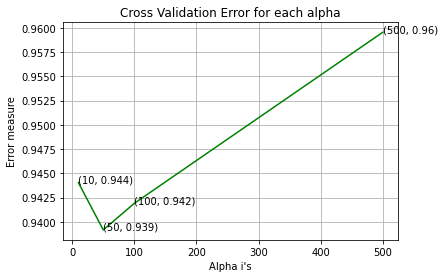

Train For values of best alpha =  50 The train log loss is: 0.8929906911474927
CV For values of best alpha =  50 The cross validation 0 loss is: 0.9438423306156333
Test For values of best alpha =  50 The test log loss is: 0.9434028068473633


In [ ]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
%matplotlib inline 


X_train_norm=X_train #fs.fit_transform(X_train,y_train)
X_test_norm=X_test #fs.transform(X_test)
X_cv_norm=X_cv #fs.transform(X_cv)

#parameter
alpha=[10,50,100,500]
DEPTH_XGB, LEARNING_XGB, SUBSAMPLE_XGB, COLSAMPLE_XGB = (10, 0.07, 0.5, 0.5) 

cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,objective='multi:softprob',max_depth=DEPTH_XGB, learning_rate=LEARNING_XGB,subsample=SUBSAMPLE_XGB, colsample_bytree=COLSAMPLE_XGB)
    #x_cfl.fit(X_train_norm,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train)
    predict_y = sig_clf.predict_proba(X_cv_norm)
    loss=log_loss(y_cv, predict_y, labels=sig_clf.classes_, eps=1e-15)
    print('log loss for c = ',i,'is', loss)
   
    y_pred=sig_clf.predict(X_cv_norm)
    accuracy=accuracy_score(y_cv,y_pred)
    print('NDGC Score :',ndcg_score(y_cv, sig_clf.predict_proba(X_cv_norm), k=5))
    print('\n')
    cv_log_error_array.append(loss)

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1)
x_cfl.fit(X_train_norm,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_norm, y_train)
    
predict_y = sig_clf.predict_proba(X_train_norm)
print ('Train For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y)) #,'and NDGC Score : ',ndcg_score(y_train, predict_y, k=5))

predict_y = sig_clf.predict_proba(X_cv_norm)
print('CV For values of best alpha = ', alpha[best_alpha], "The cross validation 0 loss is:",log_loss(y_cv, predict_y))# ,'and NDGC Score : ',ndcg_score(y_cv, predict_y, k=5))

predict_y = sig_clf.predict_proba(X_test_norm)
print('Test For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))#,'and NDGC Score : ',ndcg_score(y_test, predict_y, k=5))
y_pred=sig_clf.predict(X_test_norm)





**Cataboost Classifier**

In [ ]:
!pip install catboost

log loss for Iteration =  500 is 0.9319857472357669
NDGC Score : 0.8535285543065404


log loss for Iteration =  1000 is 0.9234766726327123
NDGC Score : 0.8555582558702717


log loss for Iteration =  1500 is 0.9238872465165385
NDGC Score : 0.8549183177637173


log loss for Iteration =  2000 is 0.9223918576500559
NDGC Score : 0.8551540986242057




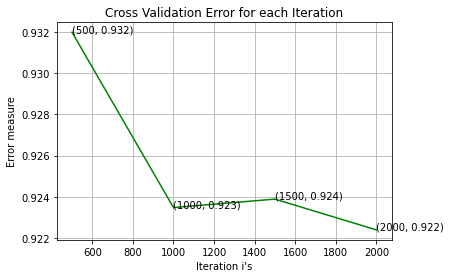

Train For values of best Iteration =  2000 The train log loss is: 0.9660243478024582
CV For values of best Iteration =  2000 The cross validation 0 loss is: 0.9776761548441462
Test For values of best Iteration =  2000 The test log loss is: 0.9743200525838666


In [ ]:
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
%matplotlib inline 


X_train_norm=X_train #fs.fit_transform(X_train,y_train)
X_test_norm=X_test #fs.transform(X_test)
X_cv_norm=X_cv #fs.transform(X_cv)

#parameter
alpha=[500,1000,1500,2000]

cv_log_error_array=[]
for i in alpha:
    sig_clf=CatBoostClassifier(task_type="GPU",iterations=i,depth =5,verbose=0)
    sig_clf.fit(X_train_norm,y_train)
    #sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_norm, y_train)
    predict_y = sig_clf.predict_proba(X_cv_norm)
    loss=log_loss(y_cv, predict_y, labels=sig_clf.classes_, eps=1e-15)
    print('log loss for Iteration = ',i,'is', loss)
   
    y_pred=sig_clf.predict(X_cv_norm)
    accuracy=accuracy_score(y_cv,y_pred)
    print('NDGC Score :',ndcg_score(y_cv, sig_clf.predict_proba(X_cv_norm), k=5))
    print('\n')
    cv_log_error_array.append(loss)

best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each Iteration")
plt.xlabel("Iteration i's")
plt.ylabel("Error measure")
plt.show()

sig_clf=CatBoostClassifier(task_type="GPU",iterations=i,depth =5,verbose=0)
sig_clf.fit(X_train_norm,y_train)
sig_clf.fit(X_train_norm, y_train)
    
predict_y = sig_clf.predict_proba(X_train_norm)
print ('Train For values of best Iteration = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y)) #,'and NDGC Score : ',ndcg_score(y_train, predict_y, k=5))

predict_y = sig_clf.predict_proba(X_cv_norm)
print('CV For values of best Iteration = ', alpha[best_alpha], "The cross validation 0 loss is:",log_loss(y_cv, predict_y))# ,'and NDGC Score : ',ndcg_score(y_cv, predict_y, k=5))

predict_y = sig_clf.predict_proba(X_test_norm)
print('Test For values of best Iteration = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))#,'and NDGC Score : ',ndcg_score(y_test, predict_y, k=5))
y_pred=sig_clf.predict(X_test_norm)

**Model Comparison table**

In [ ]:
from tabulate import tabulate
print(tabulate([['Random forest', 0.948],['Logistic Regression', 0.954],['XGboost', 0.939],['Cataboost', 0.923]], headers=['Model', 'Logloss']))

Model                  Logloss
-------------------  ---------
Random forest            0.948
Logistic Regression      0.954
XGboost                  0.939
Cataboost                0.923


**Final Submission by Choosing Best Classifier model is cataboost with hyperparameter tunning.**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from catboost import CatBoostClassifier
#Training on complete train dataset
le = LabelEncoder()
le.fit(labels['country_destination'])
'''
with open('drive/My Drive/label_encoder/label_encoder.pkl', "wb" ) as f:
  pkl.dump(le,f)
f.close()
'''
y_train=le.transform(labels['country_destination'])
cat = CatBoostClassifier(task_type="GPU",iterations=2000,depth =5,verbose=0)
cat.fit(final_df,y_train)
'''
with open('drive/My Drive/final_model/final_model.pkl', "wb" ) as f:
  pkl.dump(cat,f)
f.close()
'''

In [ ]:
test_df = pd.read_csv('test_users.csv')
test_id = test_df['id'].values
pred = cat.predict_proba(final_df_test)

ids = []
countries = []

# Taking the 5 classes with highest probabilities
for i in range(len(test_id)):
    idx = test_id[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(pred[i])[::-1][:5]).tolist()
    
# Create submission
submission = pd.DataFrame({"id" : ids,"country" : countries})
submission.to_csv('final_submission.csv', index = False)

**Kaggle Snapshots**

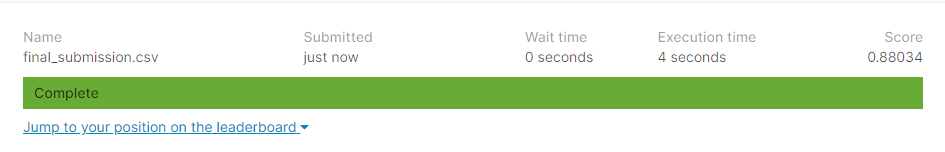

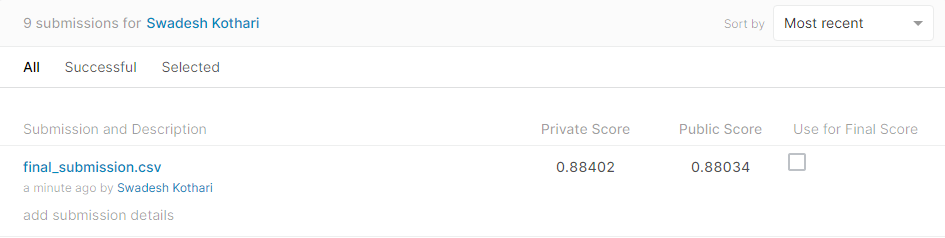

[Final Submission file link](https://colab.research.google.com/drive/1bEnFsv89-BGq5L0UauF18vAeZkHRd31e#scrollTo=c6MJoJsCl9hN)

**Production implemetation Video Link**

[video Link](https://youtu.be/N2RhOHr38WI)

**Summary of feature engineering**

1. We have extracted the day, month, year and weekday from date_account_created and timestamp_first_active and one hot encoded except year.

2. The reason of one hot encoding the day, month and weekday is to avoid to identify the ordinal pattern by the model, where as year is not the repeating values, so we can use this as ordinal or numerical features.

3. first_affiliate_tracked contain null values, which will be replaced by unknown as a seperate category because only 2% values are null in this feature.

4. Time gap : This feature will give us the time difference between  timestamp_first_active and date_account_created. 

5. Age Feature:

	a. We have fixed the range between 15 to 95 as a valid age.

	b. As we know, there are some values which are born birth of the users, so we consider values which are in the 19's range would be subtracted from Date_first_booking If it is not null, else will be subtracted from date_account_created.

	c. Rest all the values will be assign to null values.

	d. Kept null values as it is, because maximum users end up with NDF   have not mentioned their age

	e. Create one more feature which devide the age into groups of small, young, old and unknown.

	

6. Session dataset contain multiple records for a single user, It has 4 categorical features :action, action_type, action_detail, device_type and 1 numerical feature : secs_elapsed.

	a. To Solve the multiple record issue, we Concatenate all categorical features for each user and then convert it into string using comma delimeter, which give single row for each User.

	b. Create one more feature by calculating total secs_elapsed by user and device type and pivote it, So now we have amount of time spent by each user on each device type (Each device type used as feature).

	c. calculate Mean, Median,skew, standard deviation, min, max of secs_elapsed, Kurtosis for each of the user.

	d.  Creating another features by calculating number of unique action, action_type, action_details and device_type for each user.

	e. Taking inner join between user and session data.

	f. Now, convert all categorical features into onhotencoded values or TFIDF values.

7. Split our data into train, cross validated and test data.

8. We standardize the features for logistic regression only not for tree based model in the given case study for better result.

9. Label encoded the Country destination (Target variable)

10. Applied the modeling along with the hyperparameter tunning.	
11. Hyperparameter tunning resulted the Cataboost model as the best classifier with lowest logloss.
